In [1]:
import pandas as pd 
import numpy as np
#methods
from surprise import SVD, Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from mlxtend.frequent_patterns import apriori, association_rules
#other
import itertools
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df_users = pd.read_csv('Users_games_dataset.csv')
df_details = pd.read_csv('games_details_dataset.csv')

#### Association rule with apriori

In [4]:
df_users["Played"] = [True for i in range(df_users.shape[0])]
df_user_features = df_users.pivot(index='User_id',columns='Game_id',values='Played').fillna(False)
df_user_features.head()

Game_id,10,20,30,40,50,60,70,80,130,220,...,423880,480490,581300,608580,752180,764050,828860,860270,890400,961620
User_id,,,,,,,,,,,,,,,,,,,,,
5250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76767,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86540,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144736,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181212,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
freq_items = apriori(df_user_features.astype(np.uint8), min_support=0.004, use_colnames=True, verbose=1)

Processing 1547 combinations | Sampling itemset size 765


In [6]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [7]:
freq_items.head()

,support,itemsets,length
0,0.053992,(10),1
1,0.008935,(30),1
2,0.011027,(70),1
3,0.023384,(80),1
4,0.004373,(130),1


In [8]:
freq_items.tail()

,support,itemsets,length
6787,0.004278,"(4000, 304930, 440, 730, 570, 218620)",6
6788,0.004087,"(4000, 304930, 230410, 440, 730, 570)",6
6789,0.004468,"(4000, 304930, 301520, 440, 730, 570)",6
6790,0.004468,"(105600, 4000, 620, 72850, 440, 730)",6
6791,0.004183,"(105600, 8930, 620, 72850, 440, 730)",6


In [9]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [10]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22342,"(240, 440, 222880)",(730),0.004848,0.130894,0.004848,1.0,7.639797,0.004213,inf
23280,"(240, 550, 222880)",(730),0.004373,0.130894,0.004373,1.0,7.639797,0.003800,inf
55874,"(4000, 550, 222880, 440)",(730),0.004563,0.130894,0.004563,1.0,7.639797,0.003966,inf
7420,"(630, 55230)",(440),0.004658,0.220817,0.004658,1.0,4.528627,0.003629,inf
22690,"(105600, 240, 42910)",(440),0.004468,0.220817,0.004468,1.0,4.528627,0.003481,inf


In [11]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42610,(570),"(24240, 730, 4000)",0.460171,0.007605,0.004087,0.008882,1.168044,0.000588,1.001289
13661,(570),"(218620, 271590)",0.460171,0.007700,0.004087,0.008882,1.153623,0.000544,1.001193
3516,(570),"(220, 22380)",0.460171,0.007985,0.004087,0.008882,1.112423,0.000413,1.000906
1051,(570),(259080),0.460171,0.008175,0.004087,0.008882,1.086552,0.000326,1.000714
1017,(570),(220200),0.460171,0.008555,0.004087,0.008882,1.038261,0.000151,1.000330


In [12]:
print("The number of rows is {}.".format(rules.shape[0]))

The number of rows is 68308.


In [13]:
new_index = [ i for i in range(rules.shape[0])]
rules.index = new_index

In [14]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(240, 440, 222880)",(730),0.004848,0.130894,0.004848,1.0,7.639797,0.004213,inf
1,"(240, 550, 222880)",(730),0.004373,0.130894,0.004373,1.0,7.639797,0.003800,inf
2,"(4000, 550, 222880, 440)",(730),0.004563,0.130894,0.004563,1.0,7.639797,0.003966,inf
3,"(630, 55230)",(440),0.004658,0.220817,0.004658,1.0,4.528627,0.003629,inf
4,"(105600, 240, 42910)",(440),0.004468,0.220817,0.004468,1.0,4.528627,0.003481,inf


In [15]:
small_conf = []
for i in range(rules.shape[0]):
    if float(rules.iloc[i]["confidence"]) < 0.5:
        small_conf.append(i)
rules = rules.drop(labels=small_conf, axis=0)

In [16]:
print("The number of remaining rows is {}.".format(rules.shape[0]))

The number of remaining rows is 18463.


In [17]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18458,"(400, 240)",(570),0.013118,0.460171,0.006559,0.5,1.086552,0.000522,1.079658
18459,"(500, 550)",(570),0.013688,0.460171,0.006844,0.5,1.086552,0.000545,1.079658
18460,"(730, 202970)",(570),0.008555,0.460171,0.004278,0.5,1.086552,0.000341,1.079658
18461,"(4000, 221100)",(570),0.009506,0.460171,0.004753,0.5,1.086552,0.000379,1.079658
18462,"(227940, 236390)",(570),0.009506,0.460171,0.004753,0.5,1.086552,0.000379,1.079658


In [18]:
maxim = 0
for i in range(rules.shape[0]):
    if len(rules.iloc[i]["antecedents"]) > maxim:
        maxim = len(rules.iloc[i]["antecedents"])
print("The maximum lentgh of right part of the rule is {}.".format(maxim))

The maximum lentgh of right part of the rule is 5.


In [19]:
user_games = [440, 500, 570, 550]

In [20]:
all_combinations = []
for i in range(2,maxim+1):
    all_combinations += list(itertools.combinations(user_games, i))

We will find all the recommended games based on the rules.

In [21]:
recommend = []
for game in user_games:
    for i in range(rules.shape[0]):
        antecedents_list = list(rules.iloc[i]["antecedents"])
        antecedents_list.sort()
        if antecedents_list == [game]:
            print(antecedents_list,"==>",list(rules.iloc[i]["consequents"]))
            recommend+=list(rules.iloc[i]["consequents"])
for comb in all_combinations:
    for i in range(rules.shape[0]):
        antecedents_list = list(rules.iloc[i]["antecedents"])
        antecedents_list.sort()
        comb_list = list(comb)
        comb_list.sort()
        if antecedents_list == comb_list:
            print(antecedents_list,"==>",list(rules.iloc[i]["consequents"]))
            recommend+=list(rules.iloc[i]["consequents"])

[500] ==> [550]
[500] ==> [440]
[500] ==> [440, 550]
[550] ==> [440]
[440, 500] ==> [550]
[440, 500] ==> [620]
[440, 500] ==> [240]
[440, 500] ==> [400]
[440, 500] ==> [730]
[440, 500] ==> [570]
[440, 570] ==> [730]
[440, 550] ==> [730]
[440, 550] ==> [570]
[500, 570] ==> [550]
[500, 570] ==> [440]
[500, 570] ==> [440, 550]
[500, 570] ==> [730]
[500, 570] ==> [620]
[500, 570] ==> [440, 730]
[500, 570] ==> [240]
[500, 570] ==> [440, 620]
[500, 570] ==> [240, 440]
[500, 570] ==> [730, 550]
[500, 570] ==> [620, 550]
[500, 570] ==> [49520]
[500, 570] ==> [400]
[500, 570] ==> [240, 550]
[500, 570] ==> [440, 730, 550]
[500, 570] ==> [240, 550, 440]
[500, 570] ==> [72850]
[500, 550] ==> [440]
[500, 550] ==> [620]
[500, 550] ==> [730]
[500, 550] ==> [240]
[500, 550] ==> [400]
[500, 550] ==> [570]
[550, 570] ==> [440]
[550, 570] ==> [730]
[550, 570] ==> [440, 730]
[440, 500, 570] ==> [550]
[440, 500, 570] ==> [730]
[440, 500, 570] ==> [620]
[440, 500, 570] ==> [240]
[440, 500, 570] ==> [730, 55

We have to remove duplicates from the list.

In [22]:
recommend = list(dict.fromkeys(recommend))

Finally, we want to remove games that user already likes.

In [23]:
remove_rec = []
for rec in recommend:
    if user_games.count(rec)>0:
        remove_rec.append(rec)
for rec in remove_rec:
    recommend.remove(rec)

In [24]:
print(recommend)

[620, 240, 400, 730, 49520, 72850, 630, 220]


In [25]:
for i in range(df_details.shape[0]):
    if recommend.count(df_details.iloc[i]['appid'])>0:
        print(df_details.iloc[i]['appid'],"=>",df_details.iloc[i]['name'])

220 => Half-Life 2
240 => Counter-Strike Source
400 => Portal
620 => Portal 2
630 => Alien Swarm
730 => Counter-Strike Global Offensive
49520 => Borderlands 2
72850 => The Elder Scrolls V Skyrim


## Matrix Factorization using SVD

In [26]:
df_users.head()

,User_id,Game,Hours-played,Game_id,Game_genre,Game_category,Game_achievement,Game_positive_votes,rating,Played
0,151603712,The Elder Scrolls V Skyrim,273.0,72850,RPG,no_multiplayer,Have achievements,positive,5,True
1,151603712,Fallout 4,87.0,377160,RPG,no_multiplayer,Have achievements,positive,4,True
2,151603712,Fallout New Vegas,12.1,22380,Action;RPG,multiplayer,Have achievements,positive,3,True
3,151603712,Left 4 Dead 2,8.9,550,Action,multiplayer,Have achievements,positive,3,True
4,151603712,HuniePop,8.5,339800,Indie;RPG;Simulation;Strategy,no_multiplayer,Have achievements,positive,3,True


In [27]:
df_users.sort_values(by=['User_id'],inplace=True,ascending = True)

In [28]:
new_index = [ i for i in range(df_users.shape[0])]
df_users.index = new_index
df_users.head()

,User_id,Game,Hours-played,Game_id,Game_genre,Game_category,Game_achievement,Game_positive_votes,rating,Played
0,5250,Dota 2,0.2,570,Action;FreetoPlay;Strategy,multiplayer,No achievements,positive,1,True
1,5250,Team Fortress 2,0.8,440,Action;FreetoPlay,multiplayer,Have achievements,positive,1,True
2,5250,Alien Swarm,4.9,630,Action,multiplayer,Have achievements,positive,2,True
3,5250,Portal 2,13.6,620,Action;Adventure,multiplayer,Have achievements,positive,3,True
4,5250,Cities Skylines,144.0,255710,Simulation;Strategy,no_multiplayer,Have achievements,positive,5,True


In [29]:
reader = Reader()
data = Dataset.load_from_df(df_users[['User_id', 'Game_id', 'rating']], reader)

In [30]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0703  1.0721  1.0830  1.0771  1.0728  1.0751  0.0045  
MAE (testset)     0.8611  0.8622  0.8720  0.8703  0.8723  0.8676  0.0049  
Fit time          2.17    2.15    2.13    2.11    2.09    2.13    0.03    
Test time         0.08    0.06    0.06    0.13    0.06    0.08    0.02    


{'test_rmse': array([1.07032208, 1.07209264, 1.0829817 , 1.07712311, 1.07278428]),
 'test_mae': array([0.86108604, 0.86224163, 0.87203835, 0.87028823, 0.87229128]),
 'fit_time': (2.169032335281372,
  2.1462337970733643,
  2.1313624382019043,
  2.1074535846710205,
  2.0933752059936523),
 'test_time': (0.08082294464111328,
  0.06389307975769043,
  0.06292247772216797,
  0.12554645538330078,
  0.06303858757019043)}

In [31]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [32]:
#take the user id and find his index
chosen_user = 151603712
user_to_idx = {user: i for i, user in enumerate(df_users.User_id.unique())}

In [33]:
df_users[df_users['User_id'] == 151603712]

,User_id,Game,Hours-played,Game_id,Game_genre,Game_category,Game_achievement,Game_positive_votes,rating,Played
37008,151603712,The Elder Scrolls V Skyrim,273.0,72850,RPG,no_multiplayer,Have achievements,positive,5,True
37009,151603712,Dragon Age Origins - Ultimate Edition,1.3,47810,RPG,no_multiplayer,No achievements,positive,2,True
37010,151603712,HuniePop,8.5,339800,Indie;RPG;Simulation;Strategy,no_multiplayer,Have achievements,positive,3,True
37011,151603712,Dota 2,0.5,570,Action;FreetoPlay;Strategy,multiplayer,No achievements,positive,1,True
37012,151603712,Left 4 Dead 2,8.9,550,Action,multiplayer,Have achievements,positive,3,True
37013,151603712,Path of Exile,8.1,238960,Action;Adventure;FreetoPlay;Indie;MassivelyMul...,multiplayer,Have achievements,positive,3,True
37014,151603712,Fallout New Vegas,12.1,22380,Action;RPG,multiplayer,Have achievements,positive,3,True
37015,151603712,Robocraft,0.4,301520,Action;FreetoPlay;Indie;MassivelyMultiplayer;R...,multiplayer,Have achievements,positive,1,True
37016,151603712,Garry's Mod,0.1,4000,Indie;Simulation,multiplayer,Have achievements,positive,1,True
37017,151603712,Poly Bridge,7.5,367450,Indie;Simulation,multiplayer,Have achievements,positive,3,True


In [34]:
# def svd_pred(user, trainSet, svd):
anti_testset_user = []
targetUser = user_to_idx[151603712] #inner_id of the target user
fillValue = trainset.global_mean
user_item_ratings = trainset.ur[targetUser]
user_items = [item for (item,_) in (user_item_ratings)]
ratings = trainset.all_ratings()
for iid in trainset.all_items():
    if(iid not in user_items):
        anti_testset_user.append((trainset.to_raw_uid(targetUser),trainset.to_raw_iid(iid),fillValue))

In [35]:
predictions = svd.test(anti_testset_user)
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
pred.head(10)

,uid,iid,r_ui,est,details
111,151603712,292030,2.548562,3.613437,{'was_impossible': False}
337,151603712,271590,2.548562,3.441642,{'was_impossible': False}
298,151603712,107410,2.548562,3.334932,{'was_impossible': False}
115,151603712,287700,2.548562,3.325531,{'was_impossible': False}
116,151603712,236430,2.548562,3.323369,{'was_impossible': False}
395,151603712,261640,2.548562,3.313017,{'was_impossible': False}
493,151603712,313160,2.548562,3.301063,{'was_impossible': False}
7,151603712,730,2.548562,3.230659,{'was_impossible': False}
113,151603712,252490,2.548562,3.164214,{'was_impossible': False}
369,151603712,214950,2.548562,3.149424,{'was_impossible': False}


In [36]:
rec_list = pred.head(10)['iid'].to_list()
rec_list

[292030, 271590, 107410, 287700, 236430, 261640, 313160, 730, 252490, 214950]

In [37]:
game_id = {}
games = df_users["Game"].value_counts()
for game in games.keys():
    game_id[game] = df_details.iloc[list(df_details["name"]).index(game)]["appid"]

In [38]:
idx_to_game = {idx: game for game, idx in game_id.items()}

In [39]:
for rec in rec_list:
    print(str(rec)+":",idx_to_game[rec])

292030: The Witcher 3 Wild Hunt
271590: Grand Theft Auto V
107410: Arma 3
287700: METAL GEAR SOLID V THE PHANTOM PAIN
236430: DARK SOULS II
261640: Borderlands The Pre-Sequel
313160: Farming Simulator 15
730: Counter-Strike Global Offensive
252490: Rust
214950: Total War ROME II - Emperor Edition


## K-Nearest Neighbours item-oriented

In [40]:
from surprise import KNNBasic, KNNWithMeans

In [41]:
sim_options = {'name': 'cosine', 'user_based': False} # compute  similarities between items
knn = KNNWithMeans(k=30, sim_options=sim_options)
# Run 5-fold cross-validation and print results
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1038  1.1187  1.1261  1.1160  1.1145  1.1158  0.0072  
MAE (testset)     0.8770  0.8897  0.8955  0.8848  0.8801  0.8855  0.0066  
Fit time          0.47    0.49    0.52    0.49    0.49    0.49    0.02    
Test time         0.43    0.53    0.41    0.45    0.46    0.46    0.04    


{'test_rmse': array([1.10384954, 1.11869379, 1.12611204, 1.11595025, 1.11449831]),
 'test_mae': array([0.87702652, 0.88973785, 0.89552289, 0.88484666, 0.88012449]),
 'fit_time': (0.46599674224853516,
  0.4902832508087158,
  0.5212054252624512,
  0.4903883934020996,
  0.4899911880493164),
 'test_time': (0.43145179748535156,
  0.5250000953674316,
  0.4149003028869629,
  0.44653844833374023,
  0.45714855194091797)}

In [42]:
knn.fit(trainset)
predictions = knn.test(anti_testset_user)
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
pred.head(10)

Computing the cosine similarity matrix...
Done computing similarity matrix.


,uid,iid,r_ui,est,details
2070,151603712,381900,2.548562,5.000000,"{'actual_k': 0, 'was_impossible': False}"
875,151603712,3960,2.548562,5.000000,"{'actual_k': 3, 'was_impossible': False}"
1832,151603712,206020,2.548562,5.000000,"{'actual_k': 3, 'was_impossible': False}"
2317,151603712,301120,2.548562,5.000000,"{'actual_k': 0, 'was_impossible': False}"
1834,151603712,206040,2.548562,5.000000,"{'actual_k': 3, 'was_impossible': False}"
2203,151603712,390940,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
2256,151603712,351860,2.548562,5.000000,"{'actual_k': 0, 'was_impossible': False}"
1978,151603712,347590,2.548562,4.824963,"{'actual_k': 1, 'was_impossible': False}"
1327,151603712,15240,2.548562,4.808499,"{'actual_k': 2, 'was_impossible': False}"
1933,151603712,363890,2.548562,4.561436,"{'actual_k': 2, 'was_impossible': False}"


In [43]:
rec_list = pred.head(10)['iid'].to_list()
rec_list

[381900, 3960, 206020, 301120, 206040, 390940, 351860, 347590, 15240, 363890]

In [44]:
idx_to_game = {idx: game for game, idx in game_id.items()}

In [45]:
for rec in rec_list:
    print(str(rec)+":",idx_to_game[rec])

381900: Bard's Gold
3960: Shattered Union
206020: Avernum 4
301120: Eastside Hockey Manager
206040: Avernum 5
390940: The Musketeers Victoria's Quest
351860: Cultures - Northland
347590: Heroes of Hellas 3 Athens
15240: Silent Hunter Wolves of the Pacific U-Boat Missions
363890: RPG Maker MV


## K-Nearest Neighbours user-oriented

In [46]:
sim_options = {'name': 'cosine', 'user_based': True} # compute  similarities between users
knn = KNNBasic(k=150, sim_options=sim_options)
# Run 5-fold cross-validation and print results
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0931  1.0732  1.0870  1.1105  1.0954  1.0919  0.0121  
MAE (testset)     0.8861  0.8664  0.8786  0.8978  0.8834  0.8825  0.0102  
Fit time          11.99   11.76   11.63   11.60   11.47   11.69   0.18    
Test time         2.60    2.49    2.37    2.35    2.76    2.52    0.15    


{'test_rmse': array([1.09309983, 1.07324936, 1.08697447, 1.11054746, 1.09542882]),
 'test_mae': array([0.88611613, 0.86638832, 0.87864593, 0.89781414, 0.88341425]),
 'fit_time': (11.994083404541016,
  11.762730121612549,
  11.626848220825195,
  11.598957300186157,
  11.474487543106079),
 'test_time': (2.6015045642852783,
  2.487419843673706,
  2.3742170333862305,
  2.350653648376465,
  2.763279438018799)}

In [47]:
knn.fit(trainset)
predictions = knn.test(anti_testset_user)
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
pred.head(10)

Computing the cosine similarity matrix...
Done computing similarity matrix.


,uid,iid,r_ui,est,details
875,151603712,3960,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1183,151603712,297060,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1834,151603712,206040,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
2279,151603712,277450,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1158,151603712,289520,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1489,151603712,890400,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1832,151603712,206020,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1327,151603712,15240,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1064,151603712,261470,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1303,151603712,255260,2.548562,4.521183,"{'actual_k': 2, 'was_impossible': False}"


In [48]:
rec_list = pred.head(10)['iid'].to_list()
rec_list

[3960, 297060, 206040, 277450, 289520, 890400, 206020, 15240, 261470, 255260]

In [49]:
idx_to_game = {idx: game for game, idx in game_id.items()}

In [50]:
for rec in rec_list:
    print(str(rec)+":",idx_to_game[rec])

3960: Shattered Union
297060: Freaking Meatbags
206040: Avernum 5
277450: Imperial Glory
289520: King's Bounty Dark Side
890400: Uncharted Waters Online
206020: Avernum 4
15240: Silent Hunter Wolves of the Pacific U-Boat Missions
261470: Distant Worlds Universe
255260: Pro Cycling Manager 2014


## Matrix Factorization with Neural Networks

In [4]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, Flatten, Input, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import dot, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [5]:
#pip install pydot
#pip install graphviz

In [6]:
num_users = len(df_users.User_id.unique())
num_games = len(df_users.Game_id.unique())

In [7]:
# Need to map game ID to [1, num_games]
game_id_to_new_id = {}
dataset = df_users
ID = 1
for index, row in dataset.iterrows():
    if game_id_to_new_id.get(row['Game_id']) is None:
        game_id_to_new_id[row['Game_id']] = ID
        dataset.at[index, 'Game_id'] = ID
        ID += 1
    else:
        dataset.at[index, 'Game_id'] = game_id_to_new_id.get(row['Game_id'])

In [8]:
# Need to map game ID to [1, num_users]
user_id_to_new_id = {}
ID = 1
for index, row in dataset.iterrows():
    if user_id_to_new_id.get(row['User_id']) is None:
        user_id_to_new_id[row['User_id']] = ID
        dataset.at[index, 'User_id'] = ID
        ID += 1
    else:
        dataset.at[index, 'User_id'] = user_id_to_new_id.get(row['User_id'])

In [9]:
dataset.head()

,User_id,Game,Hours-played,Game_id,Game_genre,Game_category,Game_achievement,Game_positive_votes,rating
0,1,The Elder Scrolls V Skyrim,273.0,1,RPG,no_multiplayer,Have achievements,positive,5
1,1,Fallout 4,87.0,2,RPG,no_multiplayer,Have achievements,positive,4
2,1,Fallout New Vegas,12.1,3,Action;RPG,multiplayer,Have achievements,positive,3
3,1,Left 4 Dead 2,8.9,4,Action,multiplayer,Have achievements,positive,3
4,1,HuniePop,8.5,5,Indie;RPG;Simulation;Strategy,no_multiplayer,Have achievements,positive,3


In [10]:
train, test = train_test_split(dataset, test_size=0.2)

In [139]:
# inputs
latent_factors = 140
game_input = Input(shape=[1],name='game-input')
user_input = Input(shape=[1], name='user-input')

In [140]:
# Embeddings
game_embedding = Embedding(num_games + 1, latent_factors, name='game-embedding')(game_input)
game_vec = Flatten(name='flatten-game')(game_embedding)

user_embedding = Embedding(num_users + 1, latent_factors, name='user-embedding')(user_input)
user_vec = Flatten(name='flatten-user')(user_embedding)

In [141]:
# layers
dot_product = dot([game_vec, user_vec], axes=1)
dot_dropout = Dropout(0.2)(dot_product)
fc_1 = Dense(100, name='fc-1', activation='relu')(dot_dropout)
fc_1_dropout = Dropout(0.2)(fc_1)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2)(fc_2)
fc_3 = Dense(1, name='fc_3', activation='relu')(fc_2_dropout)

In [142]:
model = Model([user_input, game_input], fc_3)
model.compile(optimizer=Adam(lr=0.1), loss='mean_absolute_error')
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [143]:
model.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
game-input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user-input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
game-embedding (Embedding)      (None, 1, 80)        189040      game-input[0][0]                 
__________________________________________________________________________________________________
user-embedding (Embedding)      (None, 1, 80)        841680      user-input[0][0]                 
___________________________________________________________________________________________

Epoch 1/20
1303/1303 [==============================] - 12s 9ms/step - loss: 1.0697
Epoch 2/20
1303/1303 [==============================] - 12s 9ms/step - loss: 1.0207
Epoch 3/20
1303/1303 [==============================] - 15s 11ms/step - loss: 1.0192
Epoch 4/20
1303/1303 [==============================] - 11s 8ms/step - loss: 1.0179
Epoch 5/20
1303/1303 [==============================] - 12s 9ms/step - loss: 1.0152
Epoch 6/20
1303/1303 [==============================] - 11s 8ms/step - loss: 1.0154
Epoch 7/20
1303/1303 [==============================] - 11s 8ms/step - loss: 1.0180
Epoch 8/20
1303/1303 [==============================] - 11s 8ms/step - loss: 1.0140
Epoch 9/20
1303/1303 [==============================] - 10s 8ms/step - loss: 1.0171
Epoch 10/20
1303/1303 [==============================] - 11s 8ms/step - loss: 1.0169
Epoch 11/20
1303/1303 [==============================] - 10s 8ms/step - loss: 1.0171
Epoch 12/20
1303/1303 [==============================] - 11s 8ms/step - l

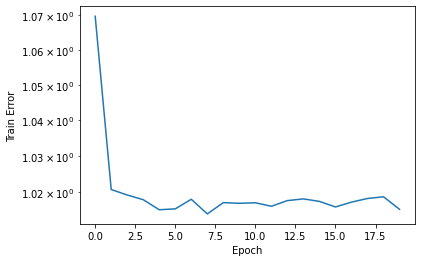

In [144]:
history = model.fit([train.User_id, train.Game_id], train.rating, epochs=20)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

In [145]:
y_hat = np.round(model.predict([test.User_id, test.Game_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

1.0021305159277742

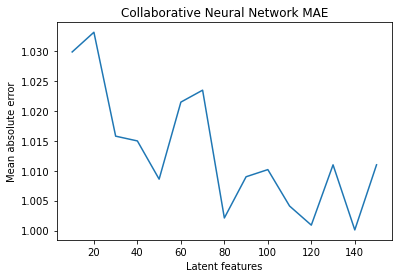

In [146]:
features = np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
mae = np.array([1.0299, 1.0332, 1.0158, 1.015, 1.0086, 1.0215, 1.0235, 1.0021, 1.009, 1.0102, 1.0041, 1.0009, 1.011, 1.0001, 1.011])

plt.title("Collaborative Neural Network MAE")
plt.ylabel("Mean absolute error")
plt.xlabel("Latent features")
plt.plot(features, mae)
plt.show()